# Deep Learning Basics

**Objectives**
* Use TensorFlow to create simple network architectures
* Understand the basics of creating a Deep Learning solution to a problem 

## Dataset

We will use the "[OCR dataset](http://ai.stanford.edu/~btaskar/ocr/)" collected by the MIT Spoken Language System Groups, which contains handwritten letters. For ease of use, the data has already been put into Numpy arrays and can be loaded directly into the Notebook or any Python script from the "letters_X.npy" and "letters_Y.npy" files.

The dataset contains 52152 letters. The letters_X.npy file contains the 16x8 pixels images (flattened to a 128-size vector), and the letters_Y.npy file contains the supervision, with for each letter a 26-size binary vector. The letter "A" would be represented by a "1" at position 0 in the vector ([1 0 0 0 ... 0]), whereas the letter "Z" would be represented by a "1" at position 25 ([0 0 0 ... 0 1]). The following code loads the 64 first letters in the dataset and displays the images and supervision.

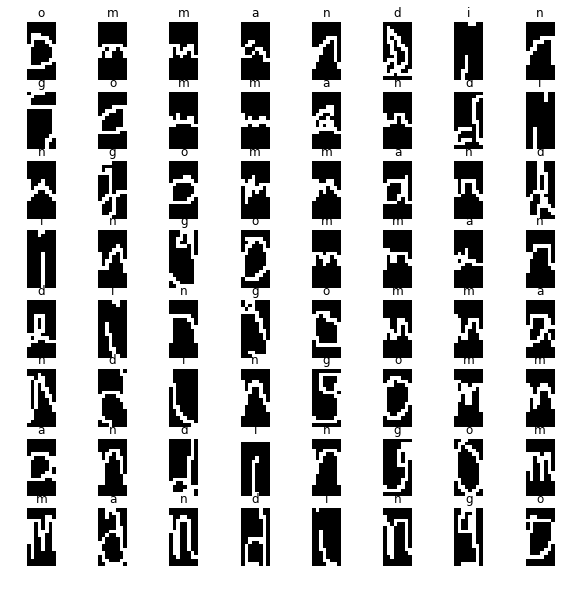

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load dataset
letters_X = np.load('letters_X.npy')
letters_Y = np.load('letters_Y.npy')
imsize = (16,8)

plt.figure(figsize=(10,10))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(letters_X[i].reshape(imsize), cmap=plt.cm.gray)
    plt.title(chr(97+letters_Y[i].argmax()))
    plt.axis('off')
plt.show()

## Creating training and test sets

Split this dataset into a **training set**, a **validation set** and a **test set**. 

How can you make sure that they all share the same prior probability distribution ?

In [3]:

## -- Your code here -- ##


## Creating a Deep Neural Network with TensorFlow : a fake example

[TensorFlow](https://www.tensorflow.org/) is an "open source machine learning framework". It contains many operations which allow us to build, train and run Deep Neural Networks and to take full advantage of GPU acceleration.

The process of creating a neural network with TensorFlow contains different steps :

1. Creating the "Network Graph"
2. Defining the cost function and the optimizer
3. Training the network on the training set
4. Evaluating the network on the test

### Creating the "Network Graph"

The Network Graph contains all the operations that will be used for learning and in production. The network is built by "layers", connecting the output of an operation to the input of the next one. Let's use a simple example:

In [4]:
import tensorflow as tf

# Creating two "inputs"
a = tf.constant(1)
b = tf.constant(2)

# Creating an operation
c = tf.add(a, b)

print(a,b,c)

Tensor("Const:0", shape=(), dtype=int32) Tensor("Const_1:0", shape=(), dtype=int32) Tensor("Add:0", shape=(), dtype=int32)


An important thing to note is that, when building the graph, none of those operations are actually evaluated. We have just defined them. To execute graph operations, we have to define a session, and to evaluate the operation within the session :

In [5]:
sess = tf.Session()

c_evaluated = c.eval(session=sess)
print(c_evaluated)

3


An interesting type of element in the graph is the "placeholder". A placeholder can be defined as an object of a certain type and size, whose value will be given only during the evaluation. Let's reset the graph and recreate it with placeholders instead of the constant:

In [6]:
tf.reset_default_graph() # If we don't do that, we will keep adding new operations to the graph !

# Creating placeholder
a = tf.placeholder(tf.float32, shape=()) # Use shape = () if the object is a scalar
b = tf.placeholder(tf.float32, shape=())

# Creating opeartion
c = tf.add(a,b)

print(a,b,c)

Tensor("Placeholder:0", shape=(), dtype=float32) Tensor("Placeholder_1:0", shape=(), dtype=float32) Tensor("Add:0", shape=(), dtype=float32)


If we try to simply evaluate `c`, we will get an error: 
> "You must feed a value for placeholder tensor"

In [7]:
sess = tf.Session()

print(c.eval(session=sess))

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[Node: Add/_1 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_7_Add", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder', defined at:
  File "C:\Users\Administrateur\Anaconda2\envs\tf14\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Administrateur\Anaconda2\envs\tf14\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-310793b4603c>", line 4, in <module>
    a = tf.placeholder(tf.float32, shape=()) # Use shape = () if the object is a scalar
  File "C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1599, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 3090, in _placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\tensorflow\python\framework\ops.py", line 2956, in create_op
    op_def=op_def)
  File "C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\tensorflow\python\framework\ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[Node: Add/_1 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_7_Add", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


We can do that using the `feed_dict` argument of `eval`:

In [8]:
c_evaluated = c.eval(session=sess, feed_dict={a: 5, b: 3})
print(c_evaluated)

8.0


We can now start building something a bit more complex. The following example creates a network with the following characteristics :

* As **input**, a batch of 10x10x1 pixels images.
* One "**convolutional layer**" with 16 3x3 kernel and the "Leaky ReLU" activation function
* One operation to **flatten** the resulting "feature maps" into vectors
* One "**dense layer**" with as output a size 5 vector and the "Leaky ReLU" activation function
* One "**softmax**" layer applied at the end to get a "probability distribution" for the 5 "classes" 

In [9]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, 10, 10, 1]) # "None" is interpreted in this case by TensorFlow as "unknown"
conv = tf.layers.conv2d(X, 16, 3, activation=tf.nn.leaky_relu, kernel_initializer=tf.contrib.layers.variance_scaling_initializer())
print(conv.get_shape()) # What's the effect of the convolution on the shape of the output ? Why ?
flat = tf.layers.flatten(conv)
print(flat.get_shape())
dense = tf.layers.dense(flat, 5, activation=tf.nn.leaky_relu)
print(dense.get_shape())
softmax = tf.nn.softmax(dense)
print(softmax.get_shape())

(?, 8, 8, 16)
(?, 1024)
(?, 5)
(?, 5)


If we want to evaluate the "ouput" of our network, we must give as input a batch of 10x10x1 images. Let's create 2 random images, and get the output :

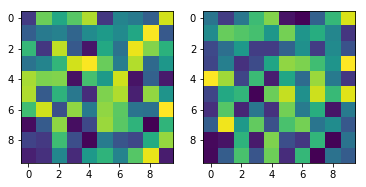

[[ 0.17761146  0.20413478  0.14053269  0.20804606  0.26967505]
 [ 0.17995864  0.14955208  0.15240826  0.26249883  0.25558224]]


In [10]:
Xrand = np.random.random((2,10,10,1))
# Show the two images:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(Xrand[0,:,:,0])
plt.subplot(1,2,2)
plt.imshow(Xrand[1,:,:,0])
plt.show()

sess = tf.Session()
sess.run(tf.global_variables_initializer())
output = softmax.eval(session=sess, feed_dict={X: Xrand})
print(output)

### Defining the cost function and the optimizer

As we can see, for each of the two "images", we have a size-5 "output" vector. This is of course at the moment all meaningless, unless we train this network to actually *do* something.

In a supervised problem, we have *two* inputs: the images, and the target output. We also have a cost function which compares the "target" and the "prediction". In classification problems, the most common cost function is the cross-entropy. In regression problems, it's the mean square error. Let's create the target and the cross-entropy cost function:

In [11]:
target = tf.placeholder(tf.float32, [None, 5]) # Target must have the same shape as the output
cost = tf.nn.softmax_cross_entropy_with_logits(labels=target, logits=dense) 
# Note that the "softmax cross entropy" function already does the "softmax" operation, so we don't do logits=softmax but logits=dense.
print(cost.get_shape())

(?,)


As we can see, this computes a cost "per image". When training a neural network, we want to have a cost "per batch", which will usually be simply the mean value of the "per image" cost:

In [12]:
cost_avg = tf.reduce_mean(cost)
print(cost_avg.get_shape())

()


Finally, we have to define the optimizer. Tensorflow provides different options, which are all variants of the simple Gradient Descent algorithm. We will use here the "Adam" optimizer, which tend to perform well. With this optimizer, we can define the "training step" of the algorithm, meaning "what the training algorithm must do at each iteration". In this case, we want to use the optimizer to minimize the cost function:

In [13]:
optimizer = tf.train.AdamOptimizer()
trainingStep = optimizer.minimize(cost_avg)

### Training the network on the training set

Right now, we don't have a training set for this fake network. Let's quickly generate one, with some simple rules:

* We will generate 1000 images
* Each image will be assigned to a random class
* Depending on the class, there will be some empty pixels in the image (0 = top-left corner, 1 = top-right, ..., 4 = none)

In [14]:
N = 1000

fake_train_class = (np.random.random((N,))*5).astype('int')
fake_train_target = np.zeros((N,5))
fake_train_images = np.random.random((N,10,10,1))

for i in range(N):
    c = fake_train_class[i]
    fake_train_target[i,c] = 1
    if( c == 0 ):
        fake_train_images[i,:5,:5,0] = 0
    elif( c== 1 ):
        fake_train_images[i,:5,5:,0] = 0
    elif( c== 2 ):
        fake_train_images[i,5:,:5,0] = 0
    elif( c== 3 ):
        fake_train_images[i,5:,5:,0] = 0

Now let's use this training set to train our network. We will use a batch size of 10 (meaning that the network is trained on 10 images at a time), and go through all images once (= "trained for 1 epoch").

In [16]:
BATCH_SIZE = 10
EPOCHS = 1

# Reset session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for e in range(EPOCHS):
    for i in range(N//BATCH_SIZE):
        # Load batch
        batch_X = fake_train_images[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
        batch_Y = fake_train_target[i*BATCH_SIZE:(i+1)*BATCH_SIZE]

        # Perform training step
        trainingStep.run(session=sess, feed_dict={X: batch_X, target: batch_Y})

### Evaluating the network on the test set

The network has been "trained", but we have no idea how well it performs ! To do that, we should generate a test set which we will use to see if the network prediction matches the target. As we are generating the examples, we can make as many as we like, so we will also use 1000:

In [17]:
fake_test_class = (np.random.random((N,))*5).astype('int')
fake_test_target = np.zeros((N,5))
fake_test_images = np.random.random((N,10,10,1))

for i in range(N):
    c = fake_test_class[i]
    fake_test_target[i,c] = 1
    if( c == 0 ):
        fake_test_images[i,:5,:5,0] = 0
    elif( c== 1 ):
        fake_test_images[i,:5,5:,0] = 0
    elif( c== 2 ):
        fake_test_images[i,5:,:5,0] = 0
    elif( c== 3 ):
        fake_test_images[i,5:,5:,0] = 0

We can get the prediction of the network for the entire set (if the network was bigger, we would probably have to do the prediction in batches...)

In [18]:
test_predicted = softmax.eval(session=sess, feed_dict={X: fake_test_images})

The "predicted class" will be the index of the highest value of the size 5 vector after the softmax operation. We can get it using the argmax operation:

In [19]:
print(test_predicted.shape)
test_predicted_class = test_predicted.argmax(axis=1)
print(test_predicted_class.shape)
print(fake_test_class.shape)

(1000, 5)
(1000,)
(1000,)


To get the global accuracy of the test, we can just compare the predicted class vector with the target class vector :

In [20]:
accuracy = (test_predicted_class==fake_test_class).sum()/len(test_predicted_class)
print("Accuracy : %.2f%%"%(accuracy*100))

Accuracy : 99.90%


This is very good, but the problem was extremely easy. However, you now have everything you need to create your network and apply it to the OCR problem.

## Solving the OCR dataset

Using as a template the code from the previous exercise, provided below for simplicity, create a network which will work on the OCR problem.

In [21]:
tf.reset_default_graph()

# Building the network
X = tf.placeholder(tf.float32, [None, 10, 10, 1])
conv = tf.layers.conv2d(X, 16, 3, activation=tf.nn.leaky_relu, kernel_initializer=tf.contrib.layers.variance_scaling_initializer())
flat = tf.layers.flatten(conv)
dense = tf.layers.dense(flat, 5, activation=tf.nn.leaky_relu)
softmax = tf.nn.softmax(dense)

# Preparing the training operation
target = tf.placeholder(tf.float32, [None, 5]) # Target must have the same shape as the output
cost = tf.nn.softmax_cross_entropy_with_logits(labels=target, logits=dense) 
cost_avg = tf.reduce_mean(cost)
optimizer = tf.train.AdamOptimizer()
trainingStep = optimizer.minimize(cost_avg)

# Train the network
BATCH_SIZE = 10
N = 1000
EPOCHS = 1

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for e in range(EPOCHS):
    for i in range(N//BATCH_SIZE):
        # Load batch
        batch_X = fake_train_images[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
        batch_Y = fake_train_target[i*BATCH_SIZE:(i+1)*BATCH_SIZE]

        # Perform training step
        trainingStep.run(session=sess, feed_dict={X: batch_X, target: batch_Y})

# Test the network
test_predicted = softmax.eval(session=sess, feed_dict={X: fake_test_images})
test_predicted_class = test_predicted.argmax(axis=1)

accuracy = (test_predicted_class==fake_test_class).sum()/len(test_predicted_class)
print(accuracy)

0.998


## Using TensorBoard for visualisation and monitoring

TensorBoard is a tool provided alongside TensorFlow to make it easier to inspect a network and follow the learning process. During the graph creation process, it's possible to add "[summaries](https://www.tensorflow.org/guide/summaries_and_tensorboard)", which can track the evolution of the loss, of weights, or any other measure you may be interested in. The summaries will also include a representation of the graph, which is useful to visualize (and debug) the network. 

Using the example below, which adds a summary to the fake test network, add a summary for the cost of your OCR network.

To start tensorboard, open the *Anaconda Prompt* and go to the directory where this file is located, then execute the command:

```
tensorboard --logdir=./summary
```

You'll then be able to access TensorBoard from your browser.

**Where would you use the "validation set" in the OCR data?**

In [22]:
import os

tf.reset_default_graph()

# Building the network
X = tf.placeholder(tf.float32, [None, 10, 10, 1])
conv = tf.layers.conv2d(X, 16, 3, activation=tf.nn.leaky_relu, kernel_initializer=tf.contrib.layers.variance_scaling_initializer())
flat = tf.layers.flatten(conv)
dense = tf.layers.dense(flat, 5, activation=tf.nn.leaky_relu)
softmax = tf.nn.softmax(dense)

# Preparing the training operation
target = tf.placeholder(tf.float32, [None, 5]) # Target must have the same shape as the output
cost = tf.nn.softmax_cross_entropy_with_logits(labels=target, logits=dense) 
cost_avg = tf.reduce_mean(cost)
optimizer = tf.train.AdamOptimizer()
trainingStep = optimizer.minimize(cost_avg)

# Train the network
BATCH_SIZE = 10
N = 1000
EPOCHS = 1

sess = tf.Session()

# Create Summary for the cost
tf.summary.scalar('cost_avg', cost_avg)
merged = tf.summary.merge_all()

# Create "summary" directory if it doesn't exist
if( not os.path.isdir('summary') ):
    os.mkdir('summary')

train_writer = tf.summary.FileWriter('summary', sess.graph)

sess.run(tf.global_variables_initializer())

for e in range(EPOCHS):
    for i in range(N//BATCH_SIZE):
        # Load batch
        batch_X = fake_train_images[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
        batch_Y = fake_train_target[i*BATCH_SIZE:(i+1)*BATCH_SIZE]

        # Perform training step
        trainingStep.run(session=sess, feed_dict={X: batch_X, target: batch_Y})

        # Summary writing (note: in a real application, this could for instance be done only once per epoch)
        summ = sess.run(merged, feed_dict={X: batch_X, target: batch_Y})
        train_writer.add_summary(summ, i)

# Test the network
test_predicted = softmax.eval(session=sess, feed_dict={X: fake_test_images})
test_predicted_class = test_predicted.argmax(axis=1)

accuracy = (test_predicted_class==fake_test_class).sum()/len(test_predicted_class)

## Saving and  loading networks

For a network to be useful, we need to be able to save it, and to reload it so that it can be trained once and reused as necessary. The following code shows how to save the network, load it, and access the placeholders & output necessary for inference, once again using our fake example. You should modify this code to do the same with the OCR network.

In [ ]:
import os

tf.reset_default_graph()

# Building the network
X = tf.placeholder(tf.float32, [None, 10, 10, 1])
conv = tf.layers.conv2d(X, 16, 3, activation=tf.nn.leaky_relu, kernel_initializer=tf.contrib.layers.variance_scaling_initializer())
flat = tf.layers.flatten(conv)
dense = tf.layers.dense(flat, 5, activation=tf.nn.leaky_relu)
softmax = tf.nn.softmax(dense)

# Preparing the training operation
target = tf.placeholder(tf.float32, [None, 5]) # Target must have the same shape as the output
cost = tf.nn.softmax_cross_entropy_with_logits(labels=target, logits=dense) 
cost_avg = tf.reduce_mean(cost)
optimizer = tf.train.AdamOptimizer()
trainingStep = optimizer.minimize(cost_avg)

# Train the network
BATCH_SIZE = 10
N = 1000
EPOCHS = 1

sess = tf.Session()

# Create Summary for the cost
tf.summary.scalar('cost_avg', cost_avg)
merged = tf.summary.merge_all()

# Create "summary" directory if it doesn't exist
if( not os.path.isdir('summary') ):
    os.mkdir('summary')

train_writer = tf.summary.FileWriter('summary', sess.graph)

# Create "Saver"
saver = tf.train.Saver()

sess.run(tf.global_variables_initializer())

for e in range(EPOCHS):
    for i in range(N//BATCH_SIZE):
        # Load batch
        batch_X = fake_train_images[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
        batch_Y = fake_train_target[i*BATCH_SIZE:(i+1)*BATCH_SIZE]

        # Perform training step
        trainingStep.run(session=sess, feed_dict={X: batch_X, target: batch_Y})

        # Summary writing:
        summ = sess.run(merged, feed_dict={X: batch_X, target: batch_Y})
        train_writer.add_summary(summ, i)

# Save trained network
saver.save(sess, "./fake_network.ckpt") # .ckpt = tensorflow "checkpoint" files.

We can load specific operations or tensors in the graph once it has been restored. To get the name of the operation we need, we can check the graph in TensorBoard. Alternatively, we can define the names when building the graph. We could for instance have written: `X = tf.placeholder(tf.float32, [None, 10, 10, 1], name='X')`, in which case we would access the operation with `X = tf.get_default_graph().get_operation_by_name('X')`.

In [ ]:
# Load trained network
tf.reset_default_graph()
sess = tf.Session()

saver = tf.train.import_meta_graph("./fake_network.ckpt.meta") # Restore graph
saver.restore(sess, "./fake_network.ckpt") # Restore weights

# Load placeholder:
X = tf.get_default_graph().get_operation_by_name('Placeholder').outputs[0]
# Load network output
output = tf.get_default_graph().get_operation_by_name('Softmax').outputs[0]

# Test the network
test_predicted = output.eval(session=sess, feed_dict={X: fake_test_images})
test_predicted_class = test_predicted.argmax(axis=1)

accuracy = (test_predicted_class==fake_test_class).sum()/len(test_predicted_class)
print(accuracy)